#  JHILAM ROY_TSF-DSBA_INTERN_OCT'20

#  TSF DSBA TASK-1

# PREDICTION USING SUPERVISED ML

### PROBLEM: PREDICT THE PERCENTAGE OF MARKS OF A STUDENT BASED ON THE NUMBER OF STUDY HOURS

In [1]:
#IMPORTING ALL IMPORTANT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [4]:
#IMPORTING AND READING THE DATASET
import requests
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
res=requests.get(url,allow_redirects=True)
with open('student_scores.csv','wb') as file:
    file.write(res.content)
df=pd.read_csv('student_scores.csv')

## EXPLORING THE DATA

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


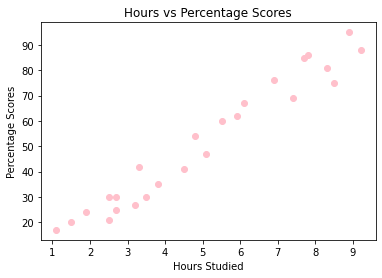

In [35]:
plt.scatter(df['Hours'],df['Scores'],color='pink',label='Scores')
plt.title('Hours vs Percentage Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

FROM THE ABOVE PLOT WE CAN CLEARLY SEE A POSITIVR LINEAR RELATION BETWEEN HOURS STUDIED BY A STUDENT AND HIS PERCENTAGE OF SCORE

## PREPARING THE MODEL

In [17]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,1].values

In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=50)

In [71]:
#FITTING OF THE MODEL
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

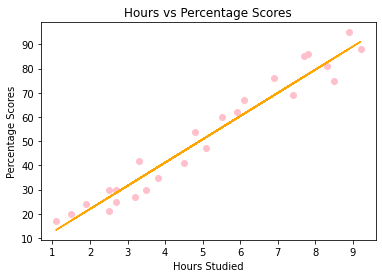

In [72]:
line=reg.coef_*X+reg.intercept_
plt.scatter(X,Y,color='pink')
plt.plot(X,line,color="orange");
plt.title('Hours vs Percentage Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

In [73]:
Y_pred=reg.predict(X_test)

## COMPARISION OF ACTUAL AND PREDICTED SCORES

In [79]:
df_new=pd.DataFrame({'Actul Scores':Y_test,'Predicted Scotes':Y_pred})
df_new

,Actul Scores,Predicted Scotes
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


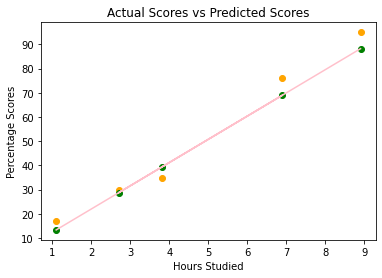

In [75]:
plt.scatter(X_test,Y_test,color='orange',label='Actual Scores')
plt.scatter(X_test,Y_pred,color='green',label='Predicted Scores')
plt.plot(X_test,Y_pred,color='pink',label='Best Fit')
plt.title('Actual Scores vs Predicted Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

In [76]:
# PREDICTING THE SCORE FOR A PARTICULAR STUDY HOUR
Hours=9.25
own_pred=reg.predict(np.array(Hours).reshape(1,-1))
print("Hours Studied = {}".format(Hours))
print("Predicted Percentage Score = {}".format(own_pred[0]))

Hours Studied = 9.25
Predicted Percentage Score = 91.56986604454477


## MODEL EVALUATION

In [77]:
print("Mean Absolute Error =",metrics.mean_absolute_error(Y_test,Y_pred))

Mean Absolute Error = 4.5916495300630285


THE MEAN ABSOLUTE ERROR IS SMALL FOR OUR MODEL; HENCE WE CAN SAY THAT THE MODEL FITS WELL.